# Exploratory analysis of Unsplash dataset


Click [here](#unlabelled), to skip the preprocessing part and load the dataset.

## Loading libraries

In [1]:
import numpy as np
import pandas as pd
from glob import glob
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import os
import sys

sys.path.insert(0, os.path.abspath('../../utils/'))
import data_utils as du

In [2]:
pd.options.display.max_columns = 26
pd.options.display.max_rows = 40

In [3]:
%run plt_style.py
%matplotlib inline

## Loading the datasets in Pandas

Make sure that you correctly point to the correct path.

In [37]:
path = '../../../dataset/unsplash-dataset/'
#path = '../../dataset/unsplash-dataset-v1.1.0/'
#documents = ['photos','colors']
documents = ['photos']

datasets = {}

for doc in documents:
    files = glob(path + doc + ".tsv*")

    subsets = []
    for filename in files:
        df = pd.read_csv(filename, sep='\t', header=0)
        subsets.append(df)

    datasets[doc] = pd.concat(subsets, axis=0, ignore_index=True)

In [38]:
datasets['photos'].head()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photographer_username,photographer_first_name,photographer_last_name,exif_camera_make,exif_camera_model,exif_iso,exif_aperture_value,exif_focal_length,exif_exposure_time,photo_location_name,photo_location_latitude,photo_location_longitude,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence
0,8ZgJyLGbC7Y,https://unsplash.com/photos/8ZgJyLGbC7Y,https://images.unsplash.com/40/KJyFV5SZSweiYGh...,2014-07-05 13:43:36,t,martindorsch,Martin,Dörsch,SONY,SLT-A77V,100.0,8.0,28.0,1/640,"Weigersdorf 29, 4551 Weigersdorf, Austria, Wei...",48.043625,14.066983,Austria,Weigersdorf,8278047,52989,narrow road in between soil grounds,NaN,NaN,NaN,NaN
1,-_rYK0egLWE,https://unsplash.com/photos/-_rYK0egLWE,https://images.unsplash.com/31/xDtuvK3GRJGUSUH...,2014-03-18 16:35:04,t,oliviahenry,Olivia,Henry,Canon,Canon EOS 1100D,250.0,5.6,55.0,1/800,NaN,NaN,NaN,NaN,NaN,5123860,42464,sea waves splashing through stone,NaN,NaN,NaN,NaN
2,PewUcrT1yIw,https://unsplash.com/photos/PewUcrT1yIw,https://images.unsplash.com/photo-141535311598...,2014-11-07 09:44:28,t,freephotosbydawn,Dawn,Emerick,Canon,Canon EOS REBEL T3i,400.0,8.0,18.0,0.3,NaN,NaN,NaN,NaN,NaN,1571552,7214,tall palm trees near sea with docks taken unde...,NaN,NaN,NaN,NaN
3,kFxWDfj0pD8,https://unsplash.com/photos/kFxWDfj0pD8,https://images.unsplash.com/photo-142224671965...,2015-01-26 04:20:40,t,alexjones,Alex,Jones,Canon,Canon EOS REBEL T3,1600.0,1.8,50.0,1/500,NaN,NaN,NaN,NaN,NaN,2843128,12718,stack of firewoods,NaN,NaN,NaN,NaN
4,r3ZWnitp3zk,https://unsplash.com/photos/r3ZWnitp3zk,https://images.unsplash.com/photo-141582700792...,2014-11-12 21:17:08,t,envisual,Charlie,Hang,NIKON CORPORATION,NIKON D3200,100.0,5.6,55.0,1/100,NaN,NaN,NaN,NaN,NaN,961314,3119,brown rock formation on body of water,NaN,NaN,NaN,NaN


In [39]:
datasets['photos'].shape

(25000, 26)

# Exploratory analysis
   

## Photos

In [7]:
datasets['photos'].columns

Index(['photo_id', 'photo_url', 'photo_image_url', 'photo_submitted_at',
       'photo_featured', 'photographer_username', 'photographer_first_name',
       'photographer_last_name', 'exif_camera_make', 'exif_camera_model',
       'exif_iso', 'exif_aperture_value', 'exif_focal_length',
       'exif_exposure_time', 'photo_location_name', 'photo_location_latitude',
       'photo_location_longitude', 'photo_location_country',
       'photo_location_city', 'stats_views', 'stats_downloads',
       'ai_description', 'ai_primary_landmark_name',
       'ai_primary_landmark_latitude', 'ai_primary_landmark_longitude',
       'ai_primary_landmark_confidence'],
      dtype='object')

## Null values

In [7]:
datasets['photos'].isna().sum()

photo_id                              0
photo_url                             0
photo_image_url                       0
photo_submitted_at                    0
photo_featured                        0
photo_width                           0
photo_height                          0
photo_aspect_ratio                    0
photo_description                 14225
photographer_username                 0
photographer_first_name               0
photographer_last_name             1693
exif_camera_make                   2752
exif_camera_model                  2796
exif_iso                           3141
exif_aperture_value                3542
exif_focal_length                  3444
exif_exposure_time                 3162
photo_location_name               15416
photo_location_latitude           17984
photo_location_longitude          17987
photo_location_country            16319
photo_location_city               18928
stats_views                           0
stats_downloads                       0


## Unsplash v1.1.0+ includes color table

In [50]:
dfcolours=datasets['colors'].copy()

In [51]:
dfcolours.head()

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
0,QLDsnAtuyQU,9DA2A3,157,162,163,darkgray,0.056800,0.213593
1,P2iRe3Okd4U,6C6F6C,108,111,108,dimgray,0.259333,0.256897
2,xXa4h--mrbM,9B684E,155,104,78,sienna,0.024133,0.065972
3,xXa4h--mrbM,C54830,197,72,48,sienna,0.035600,0.056608
4,Wtc9YH-g8Ag,ACBFCE,172,191,206,lightsteelblue,0.013333,0.056855


In [54]:
dfcolours.loc[dfcolours['photo_id']=='P2iRe3Okd4U']

,photo_id,hex,red,green,blue,keyword,ai_coverage,ai_score
1,P2iRe3Okd4U,6C6F6C,108,111,108,dimgray,0.259333,0.256897
207,P2iRe3Okd4U,E0E1D9,224,225,217,gainsboro,0.001933,0.000990
409,P2iRe3Okd4U,BBBBB4,187,187,180,silver,0.015267,0.006914
410,P2iRe3Okd4U,394A58,57,74,88,darkslategray,0.002733,0.004085
512,P2iRe3Okd4U,545755,84,87,85,dimgray,0.215133,0.281587
1124,P2iRe3Okd4U,323539,50,53,57,darkslategray,0.156333,0.327441
1125,P2iRe3Okd4U,191C21,25,28,33,black,0.151333,0.059398
1126,P2iRe3Okd4U,969894,150,152,148,darkgray,0.158933,0.019438
1327,P2iRe3Okd4U,273442,39,52,66,darkslategray,0.034933,0.036319
1939,P2iRe3Okd4U,15202B,21,32,43,black,0.004000,0.006932


## Isolate the usefull features

In [43]:
df = datasets.copy()
photos = df['photos'].loc[:,['photo_id','photo_url', 'photo_image_url','exif_camera_make','exif_camera_model','exif_iso','exif_focal_length','exif_aperture_value','exif_exposure_time']]

#photos = df['photos'].loc[:,['photo_id','photo_url', 'photo_image_url','exif_camera_make','exif_camera_model','exif_iso','exif_focal_length','exif_aperture_value','exif_exposure_time','photo_width', 'photo_height', 'photo_aspect_ratio']]

## Data Cleaning

In [44]:
du.clean_iso(photos)

/home/steve/.virtualenvs/tf2_dev/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
du.clean_focal(photos,'mm|-|~')

Raw: 91 mm
91.0
Raw: 35mm
35.0
Raw: 85mm
85.0
Raw: 50mm
50.0
Raw: 200mm
200.0
Raw: 24mm
24.0
Raw: 60mm
60.0
Raw: 75-300
75-300->NaN
nan
Raw: 70-300
70-300->NaN
nan
Raw: 21mm
21.0
Raw: 18-105
18-105->NaN
nan
Raw: 35mm
35.0
Raw: 58mm
58.0
Raw: 18-55mm
18-55.0->NaN
nan
Raw: 74mm
74.0
Raw: 16mm
16.0
Raw: 42mm
42.0
Raw: 18mm
18.0
Raw: 14mm
14.0
Raw: 50 mm
50.0
Raw: 50 mm
50.0
Raw: 135mm
135.0
Raw: 35mm
35.0
Raw: 70-200
70-200->NaN
nan
Raw: 85mm
85.0
Raw: 35 mm
35.0
Raw: 50mm
50.0
Raw: 4.0 ~ 28mm
4.0~28.0_>NaN
nan
Raw: 50mm
50.0
Raw: 46mm
46.0
Raw: 200 mm
200.0
Raw: 50mm
50.0
Raw: 200mm
200.0
Raw: 50mm
50.0
Raw: 14mm
14.0
Raw: 85mm
85.0
Raw: 135mm
135.0
Raw: 18mm
18.0
Raw: 18-50
18-50->NaN
nan


In [14]:
du.clean_exposures(photos,'s')

Raw: 15s
15
 
Raw: 30s
30
 
Raw: 15s
15
 
Raw: 13s
13
 
Raw: 15s
15
 
Raw: 10s
10
 
Raw: 180s
180
 
Raw: 1 / 200s
1/200
 
Raw: 180s
180
 
Raw: 120s
120
 
Raw: 1/100s
1/100
 
Raw: 1/60s
1/60
 
Raw: 4s
4
 
Raw: 30s
30
 
Raw: 1/80s
1/80
 
Raw: 1/400s
1/400
 
Raw: 1/120s
1/120
 
Raw: 13s
13
 
Raw: 30s
30
 
Raw: 63 Seconds
63
 
Raw: 300s
300
 
Raw: 1/200s
1/200
 


In [15]:
du.clean_apertures(photos,',|f/|undef|inf|Inf|f')

Raw: inf
Raw: Inf
Raw: undef
Raw: undef
Raw: f/2.8
Raw: inf
Raw: 5,6
Raw: undef
Raw: undef
Raw: undef
Raw: 4,5
Raw: 5,6
Raw: 7,5
Raw: 7,5
Raw: undef
Raw: undef
Raw: f/5
Raw: f/5
Raw: f4.0
Raw: Inf
Raw: undef
Raw: undef
Raw: f/8
Raw: f4
Raw: f14
Raw: undef
Raw: 9,0
Raw: inf
Raw: inf
Raw: inf
Raw: undef
Raw: inf
Raw: inf
Raw: inf
Raw: f/5.6
Raw: 5,6
Raw: Inf
Raw: 1,8


## Discriminate Horizontal & Vertical Images

Unsplash v1.0 does not have image width/heigth and ratio features.
The next block opens images and computes the orientation.
It is obsolete now as the new dataset contains these feature and the orientation is computed on the fly. See below

In [17]:
from image_analysis.im_analysis import ImageAnalysis
ia = ImageAnalysis(photos)
photos = ia.orientation()

In [41]:
#photos = photos.to_csv('../../dataset/photos.csv')

## Load New Images

In [18]:
new_photos = pd.read_csv('../../../dataset/dataset-unlabelled/new_photos.csv')

In [7]:
new_photos

,photo_id,photo_url,photo_image_url,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,photo_width,photo_height,photo_aspect_ratio,orientation
0,79hJX_Wl6ac,https://unsplash.com/photos/79hJX_Wl6ac,https://images.unsplash.com/photo-151338385990...,Canon,Canon EOS 5D Mark II,100.0,50.0,1.8,1/200,3744,5616,0.67,0
1,9cH-uVU__0c,https://unsplash.com/photos/9cH-uVU__0c,https://images.unsplash.com/photo-150733178908...,Canon,Canon EOS 6D,200.0,80.0,5.6,1/80,3648,5472,0.67,0
2,A9Vbvh_dMG0,https://unsplash.com/photos/A9Vbvh_dMG0,https://images.unsplash.com/photo-145562546434...,SONY,ILCE-7R,100.0,55.0,9.0,1/160,3000,2001,1.50,1
3,BMO1D0CmiJo,https://unsplash.com/photos/BMO1D0CmiJo,https://images.unsplash.com/photo-150431164001...,NaN,NaN,NaN,NaN,NaN,NaN,4240,2832,1.50,1
4,DoMfuJkUuU0,https://unsplash.com/photos/DoMfuJkUuU0,https://images.unsplash.com/photo-152106072399...,Canon,Canon EOS 6D,100.0,50.0,5.6,1/500,3648,5472,0.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,qQWcD3bPFYs,https://unsplash.com/photos/qQWcD3bPFYs,https://images.unsplash.com/photo-148298700145...,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,3088,2048,1.51,1
314,OSwea3yxjT0,https://unsplash.com/photos/OSwea3yxjT0,https://images.unsplash.com/photo-149268351305...,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,5184,3456,1.50,1
315,0ZQ8vojHNuc,https://unsplash.com/photos/0ZQ8vojHNuc,https://images.unsplash.com/photo-151589043578...,SONY,ILCE-6500,160.0,30.0,1.4,1/160,6000,4000,1.50,1
316,tTjspeLiy1M,https://unsplash.com/photos/tTjspeLiy1M,https://images.unsplash.com/photo-158407979752...,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,5611,3741,1.50,1


## Unsplash v1.1.0+
### Mark orientation label, 1: horizontal, 0: vertical
This version does contains image width/heigth and ratio features.

In [18]:
orientation_labels = np.where(new_photos['photo_width']>new_photos['photo_height'],1,0)

In [19]:
new_photos['orientation'] = orientation_labels

In [20]:
new_photos

,photo_id,photo_url,photo_image_url,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,photo_width,photo_height,photo_aspect_ratio,orientation
0,79hJX_Wl6ac,https://unsplash.com/photos/79hJX_Wl6ac,https://images.unsplash.com/photo-151338385990...,Canon,Canon EOS 5D Mark II,100.0,50.0,1.8,1/200,3744,5616,0.67,0
1,9cH-uVU__0c,https://unsplash.com/photos/9cH-uVU__0c,https://images.unsplash.com/photo-150733178908...,Canon,Canon EOS 6D,200.0,80.0,5.6,1/80,3648,5472,0.67,0
2,A9Vbvh_dMG0,https://unsplash.com/photos/A9Vbvh_dMG0,https://images.unsplash.com/photo-145562546434...,SONY,ILCE-7R,100.0,55.0,9.0,1/160,3000,2001,1.50,1
3,BMO1D0CmiJo,https://unsplash.com/photos/BMO1D0CmiJo,https://images.unsplash.com/photo-150431164001...,NaN,NaN,NaN,NaN,NaN,NaN,4240,2832,1.50,1
4,DoMfuJkUuU0,https://unsplash.com/photos/DoMfuJkUuU0,https://images.unsplash.com/photo-152106072399...,Canon,Canon EOS 6D,100.0,50.0,5.6,1/500,3648,5472,0.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,qQWcD3bPFYs,https://unsplash.com/photos/qQWcD3bPFYs,https://images.unsplash.com/photo-148298700145...,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,3088,2048,1.51,1
314,OSwea3yxjT0,https://unsplash.com/photos/OSwea3yxjT0,https://images.unsplash.com/photo-149268351305...,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,5184,3456,1.50,1
315,0ZQ8vojHNuc,https://unsplash.com/photos/0ZQ8vojHNuc,https://images.unsplash.com/photo-151589043578...,SONY,ILCE-6500,160.0,30.0,1.4,1/160,6000,4000,1.50,1
316,tTjspeLiy1M,https://unsplash.com/photos/tTjspeLiy1M,https://images.unsplash.com/photo-158407979752...,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,5611,3741,1.50,1


In [17]:
new_photos.to_csv('../../../dataset/dataset-unlabelled/new_photos.csv')

## Merge old dataset with new photos

In [8]:
photos = pd.read_csv('../../../dataset/dataset-unlabelled/dataset.csv')
new_photos = pd.read_csv('../../../dataset/dataset-unlabelled/new_photos.csv')

In [11]:
new_photos.drop(columns=['photo_url','photo_image_url','photo_width','photo_height','photo_aspect_ratio'],inplace=True)

In [12]:
photos = pd.concat([photos,new_photos],ignore_index=True)

In [13]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1
...,...,...,...,...,...,...,...,...
25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1


<BarContainer object of 2 artists>

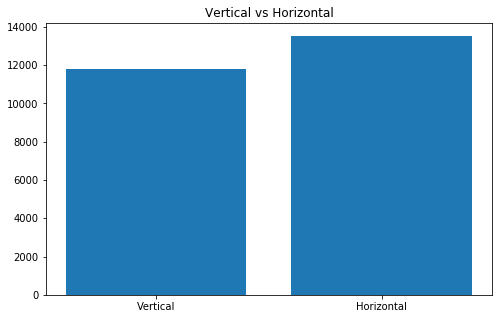

In [15]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
plt.xticks([0,1],['Vertical','Horizontal'])
plt.title("Vertical vs Horizontal")
plt.bar(dict(Counter(photos['orientation'])).keys(), dict(Counter(photos['orientation'])).values())

#### Write dataset
<a id='unlabelled'></a>

In [27]:
photos.to_csv('../../../dataset/dataset-unlabelled/photos.csv')

# Load Unlabelled dataset


In [4]:
photos = pd.read_csv('../../../dataset/dataset-unlabelled/photos.csv')

In [5]:
photos

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation
0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1
1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1
2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1
3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1
4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1
...,...,...,...,...,...,...,...,...
25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1
25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1
25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1
25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1


# Create labels

## Iso Noise Labels

### Binary Labels

In [7]:
photos.loc[(photos['exif_iso']>0) & (photos['exif_iso']<500), 'iso_noise_bin_label'] = 0
photos.loc[(photos['exif_iso']>=500), 'iso_noise_bin_label'] = 1

### Multilabels

In [8]:
photos.loc[(photos['exif_iso']>0) & (photos['exif_iso']<500), 'iso_noise_label'] = 0
photos.loc[(photos['exif_iso']>=500) & (photos['exif_iso']<1800), 'iso_noise_label'] = 1
photos.loc[(photos['exif_iso']>=1800), 'iso_noise_label'] = 2

## Depth of Field Labels - Aperture

### Binary Labels

In [14]:
photos.loc[(photos['exif_aperture_value']>0.0) & (photos['exif_aperture_value']<=3.5), 'DoF_bin'] = 0
photos.loc[(photos['exif_aperture_value']>3.5), 'DoF_bin'] = 1

### Multilabels

In [10]:
photos.loc[(photos['exif_aperture_value']>0.0) & (photos['exif_aperture_value']<3.2), 'DoF'] = 0
photos.loc[(photos['exif_aperture_value']>=3.2) & (photos['exif_aperture_value']<=5.6), 'DoF'] = 1
photos.loc[(photos['exif_aperture_value']>5.6), 'DoF'] = 2

### Exposure labels - Long, medium, quick

In [11]:
exp_zero_labels = []
exp_one_labels = []
exp_two_labels = []
idx = photos.index
for i in idx:
    a = photos['exif_exposure_time'].iloc[i]
    if '/' in str(a):
        if int(photos['exif_exposure_time'].iloc[i].split('/')[1]) <= 250:
            exp_one_labels.append(i)            
        elif int(photos['exif_exposure_time'].iloc[i].split('/')[1]) > 250:
            exp_two_labels.append(i)
    elif str(a)!='nan':
        exp_zero_labels.append(i)    

In [12]:
photos.loc[exp_zero_labels, 'exposure_label'] = 0
photos.loc[exp_one_labels, 'exposure_label'] = 1
photos.loc[exp_two_labels, 'exposure_label'] = 2

### Focal Length Label - Wide, standard, tele

### Binary labels

In [13]:
photos.loc[(photos['exif_focal_length']>0) & (photos['exif_focal_length']<=85), 'focal_label_bin'] = 0 # wide
photos.loc[(photos['exif_focal_length']>85), 'focal_label_bin'] = 1 # tele

### Multilabels

In [14]:
photos.loc[(photos['exif_focal_length']>0) & (photos['exif_focal_length']<=35), 'focal_label'] = 0 # wide
photos.loc[(photos['exif_focal_length']>35) & (photos['exif_focal_length']<=85), 'focal_label'] = 1 # standard
photos.loc[(photos['exif_focal_length']>85), 'focal_label'] = 2 # tele

In [5]:
photos

,Unnamed: 0,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation,iso_noise_bin_label,iso_noise_label,DoF_bin,DoF,exposure_label,focal_label_bin,focal_label
0,0,8ZgJyLGbC7Y,SONY,SLT-A77V,100.0,28.0,8.0,1/640,1,0.0,0.0,1.0,2.0,2.0,0.0,0.0
1,1,-_rYK0egLWE,Canon,Canon EOS 1100D,250.0,55.0,5.6,1/800,1,0.0,0.0,0.0,1.0,2.0,0.0,1.0
2,2,PewUcrT1yIw,Canon,Canon EOS REBEL T3i,400.0,18.0,8.0,0.3,1,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,3,kFxWDfj0pD8,Canon,Canon EOS REBEL T3,1600.0,50.0,1.8,1/500,1,1.0,1.0,0.0,0.0,2.0,0.0,1.0
4,4,r3ZWnitp3zk,NIKON CORPORATION,NIKON D3200,100.0,55.0,5.6,1/100,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25313,25313,qQWcD3bPFYs,NORITSU KOKI,QSS-32_33,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25314,25314,OSwea3yxjT0,Canon,Canon EOS 7D,125.0,50.0,2.5,1/320,1,0.0,0.0,0.0,0.0,2.0,0.0,1.0
25315,25315,0ZQ8vojHNuc,SONY,ILCE-6500,160.0,30.0,1.4,1/160,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25316,25316,tTjspeLiy1M,Canon,Canon EOS 5D Mark III,100.0,24.0,2.8,1/800,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [16]:
photos.to_csv('../../../dataset/dataset.csv')

## Construct the dataset (train-valid-test) 
The idea is to split the free of NaN Exif photo samples,  in training and validation sets 

The rest with NaN values is the test set

In [4]:
photos = pd.read_csv('../../../dataset/dataset.csv')

## Full dataset

(full dataset is utilised in 400x400 fixed resolution)

In [15]:
train_full, valid_full, test_full, test_nan_full = du.train_valid_test_split(photos)

In [16]:
print(train_full.shape)
print(valid_full.shape)
print(test_full.shape)
print(test_nan_full.shape)

(19301, 16)
(1072, 16)
(1072, 16)
(3873, 16)


## Horizontal - Vertical

In [18]:
horizontal_dataset = photos.loc[photos['orientation']==1]
vertical_dataset = photos.loc[photos['orientation']==0]

### Horizontal

In [19]:
train_horizontal, valid_horizontal, test_horizontal, test_nan_horizontal = du.train_valid_test_split(horizontal_dataset)

In [20]:
print(train_horizontal.shape)
print(valid_horizontal.shape)
print(test_horizontal.shape)
print(test_nan_horizontal.shape)

(10283, 16)
(571, 16)
(571, 16)
(2096, 16)


### Vertical

In [10]:
train_vertical, valid_vertical, test_vertical, test_nan_vertical = du.train_valid_test_split(vertical_dataset)

In [11]:
print(train_vertical.shape)
print(valid_vertical.shape)
print(test_vertical.shape)
print(test_nan_vertical.shape)

(9018, 16)
(501, 16)
(501, 16)
(1777, 16)


# Exif analysis in Horizontal & Vertical datasets

In [12]:
import plot_utils as pu

## Full

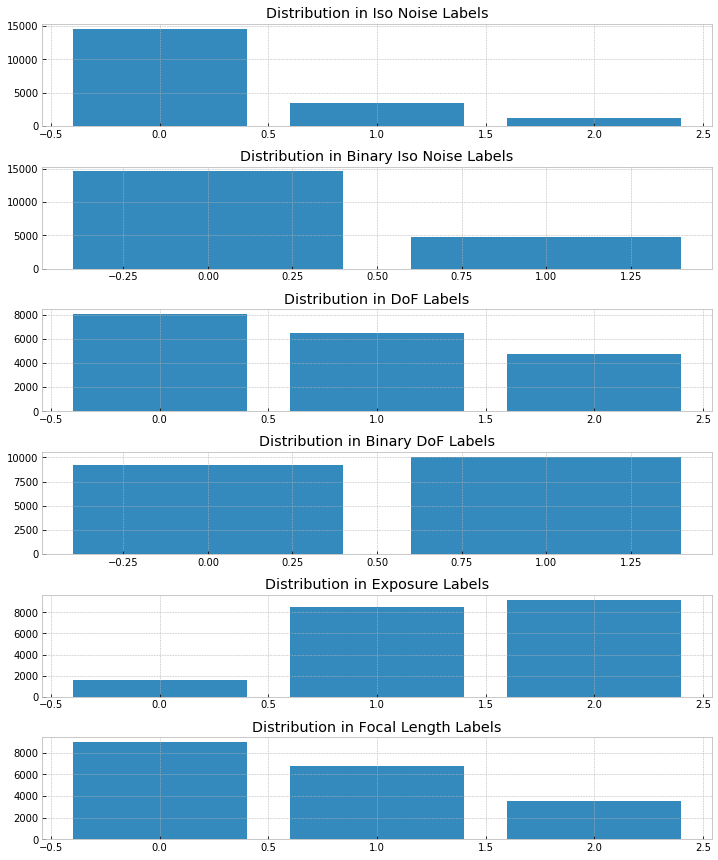

In [17]:
pu.label_distribution(train_full,'dataset')

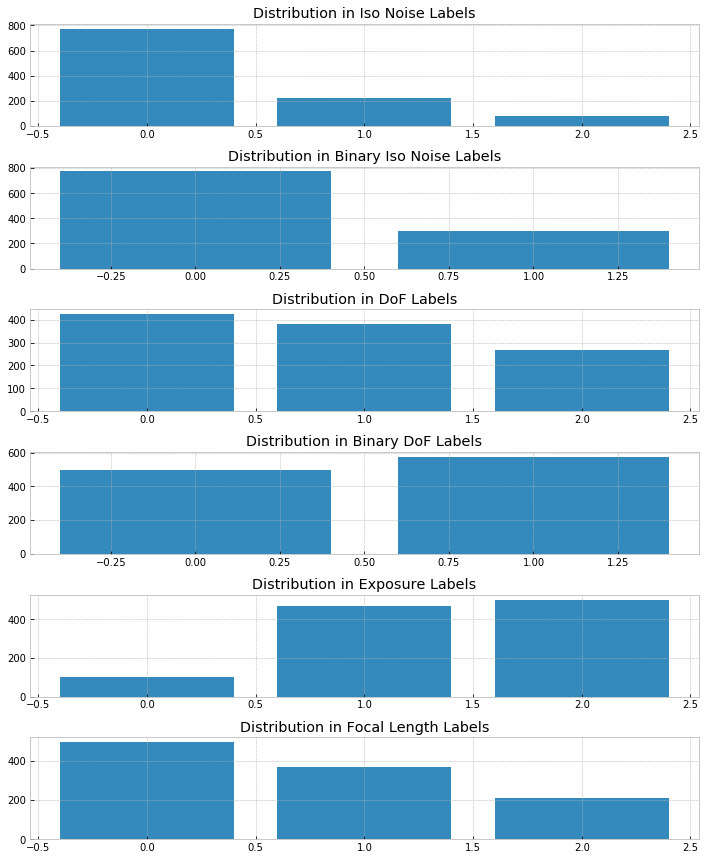

In [21]:
pu.label_distribution(valid_full,'dataset')

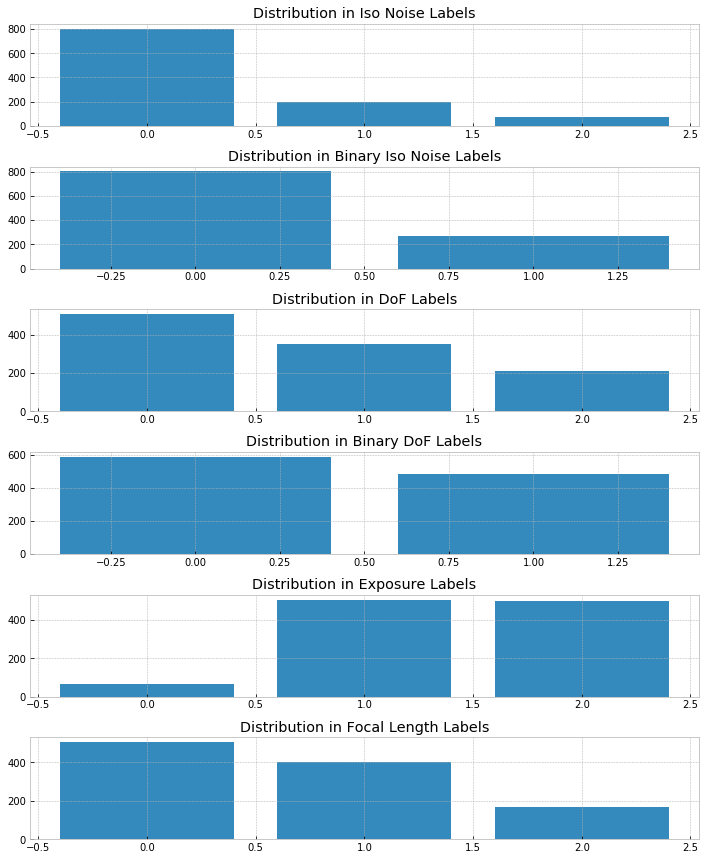

In [22]:
pu.label_distribution(test_full,'dataset')

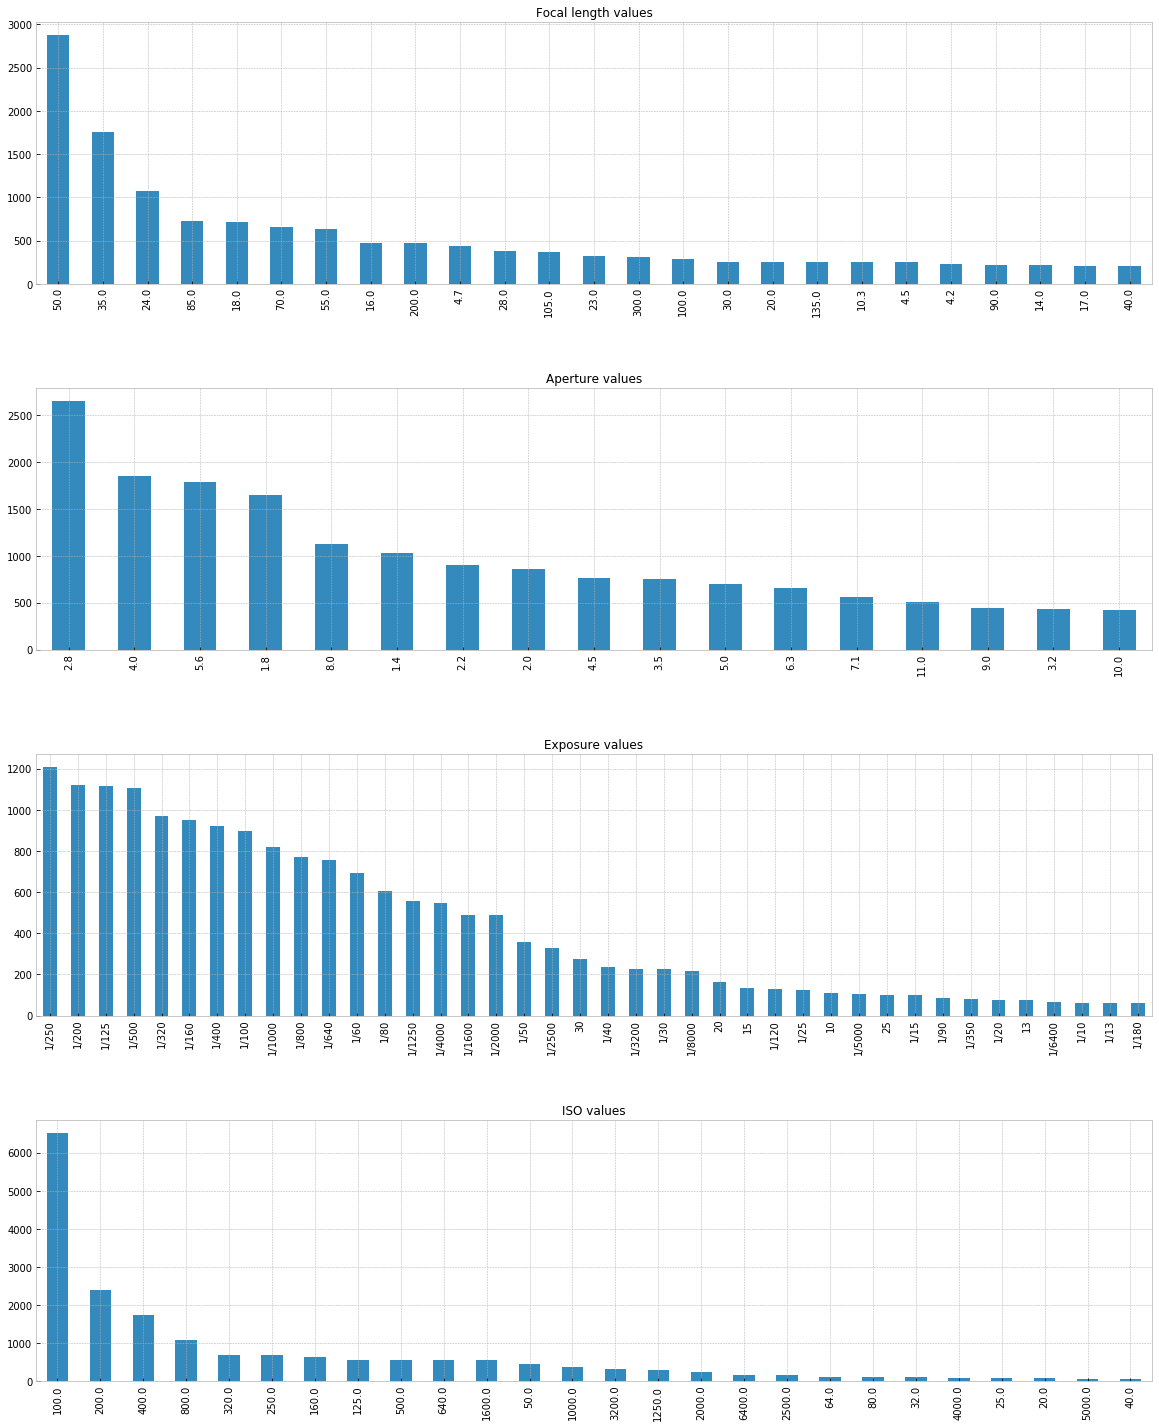

In [17]:
pu.exif_analysis(train_full,'dataset')

### Horizontal

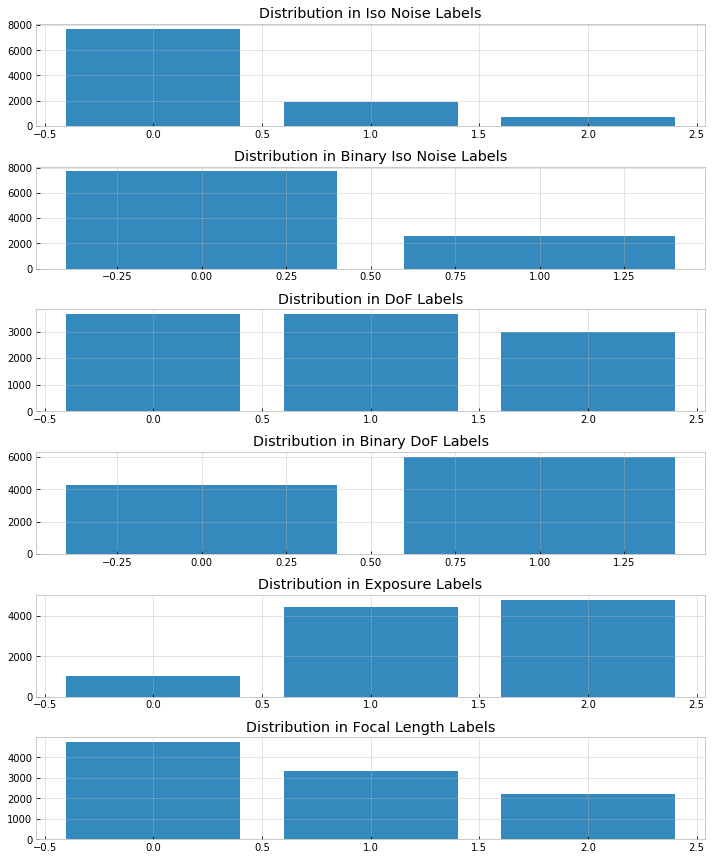

In [23]:
pu.label_distribution(train_horizontal,'dataset')

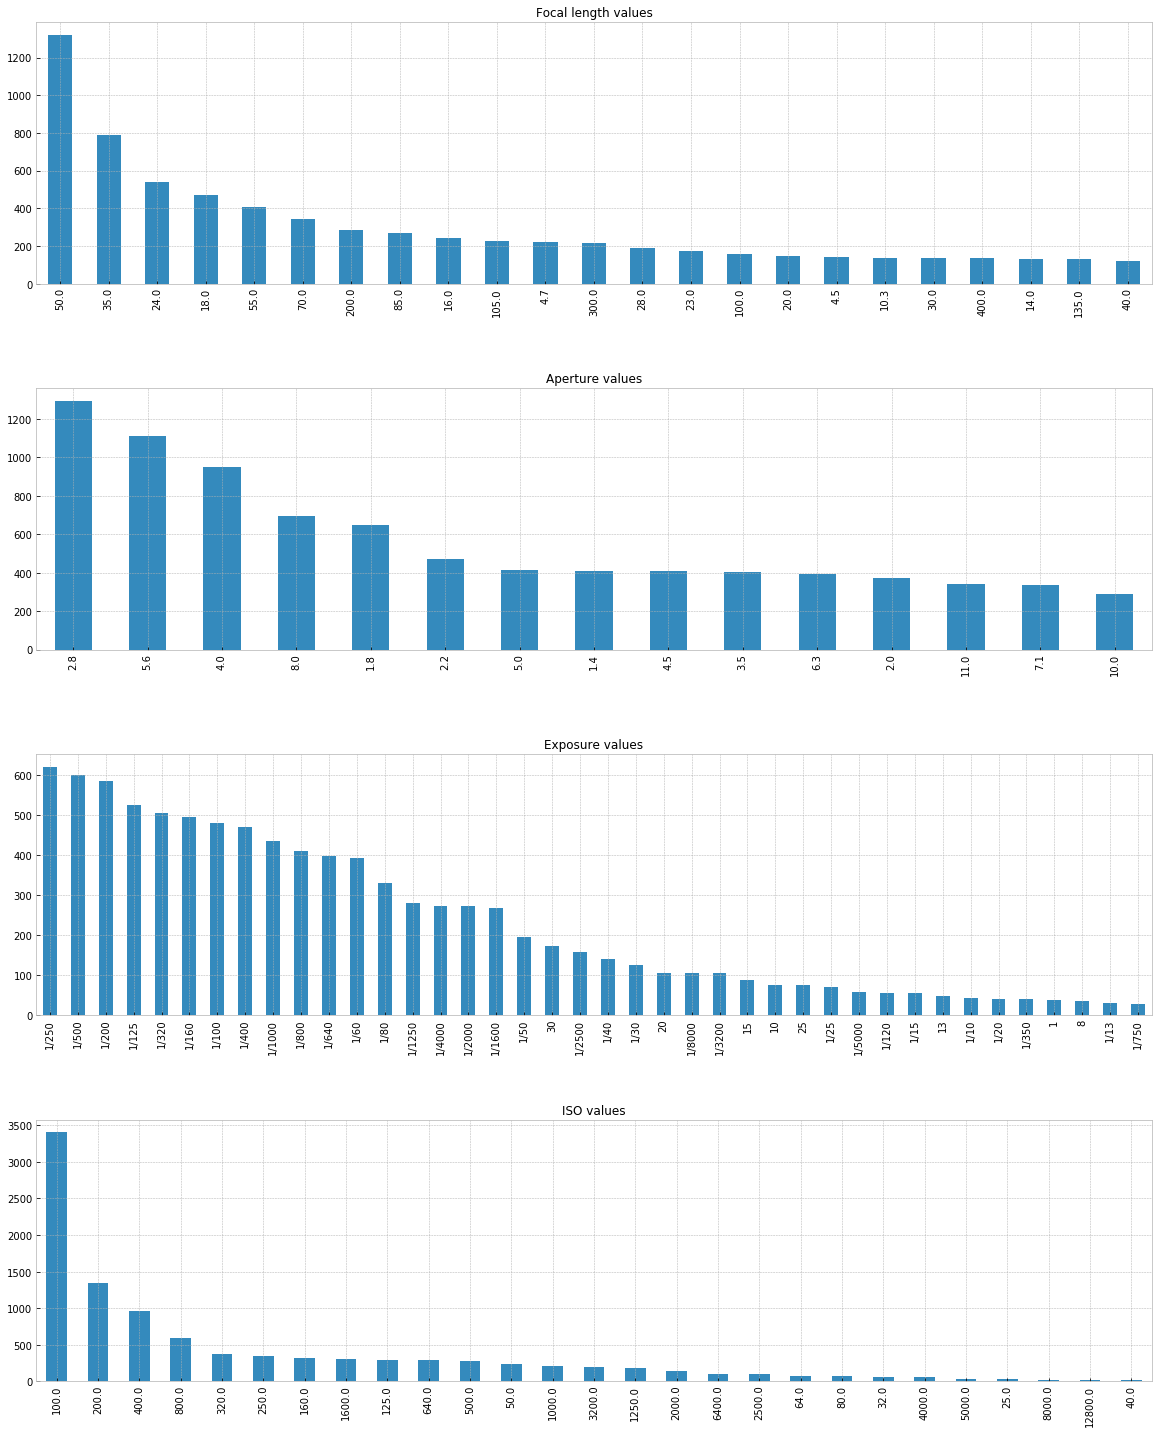

In [19]:
pu.exif_analysis(train_horizontal,'dataset')

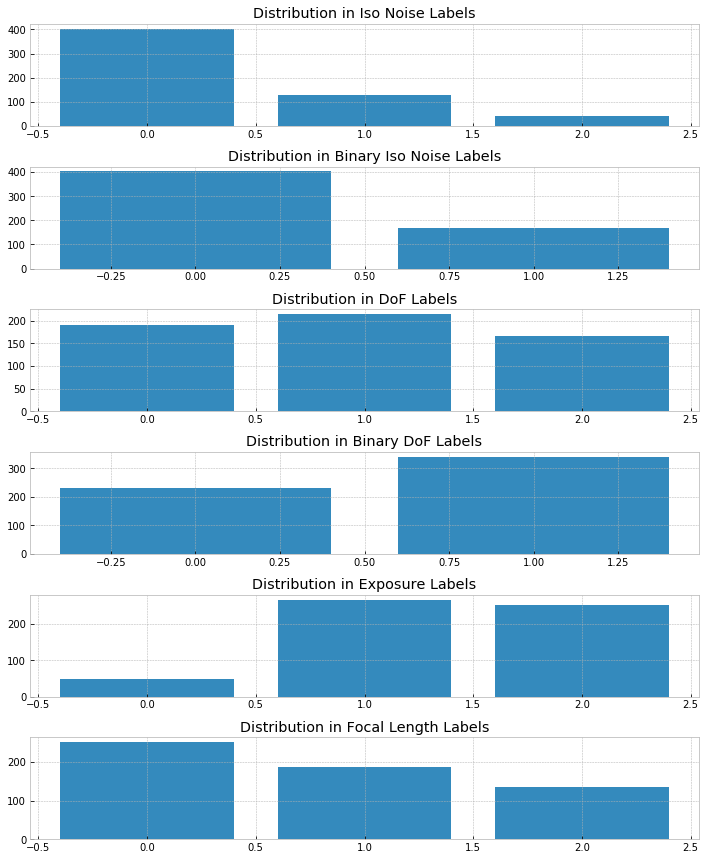

In [24]:
pu.label_distribution(valid_horizontal,'dataset')

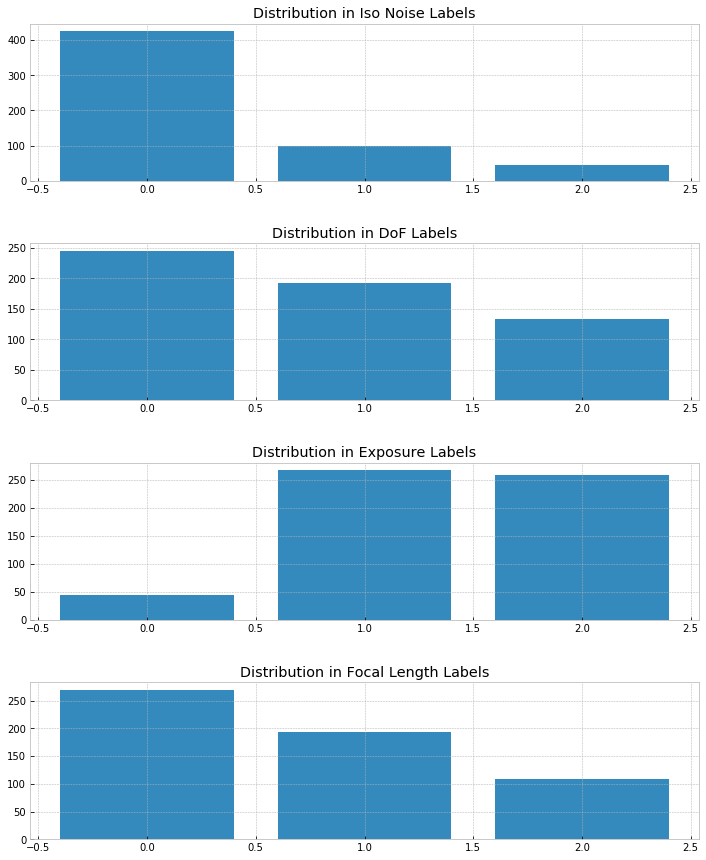

In [22]:
pu.label_distribution(test_horizontal,'dataset')

### Vertical 

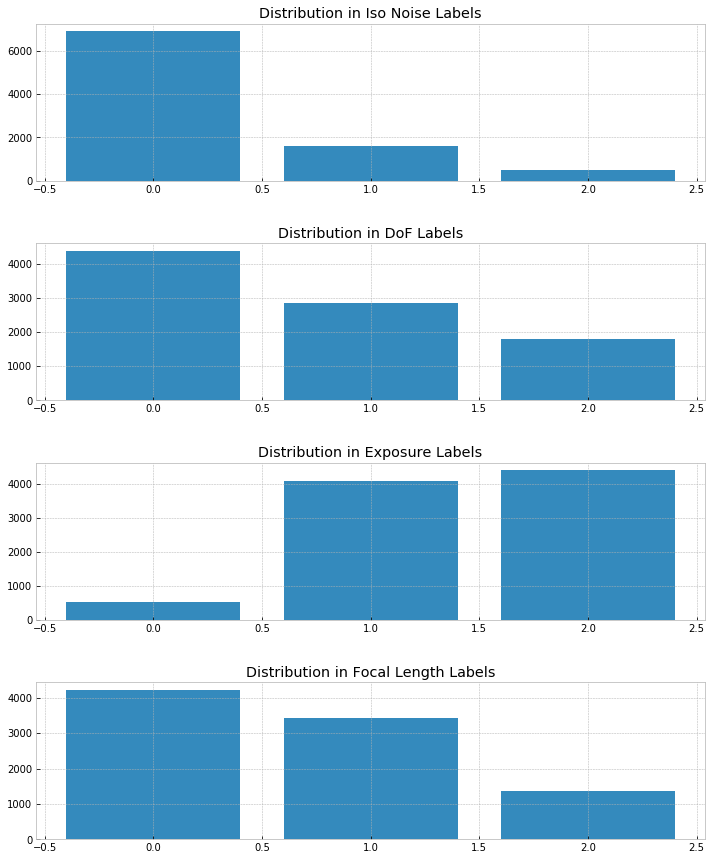

In [24]:
pu.label_distribution(train_vertical,'dataset')

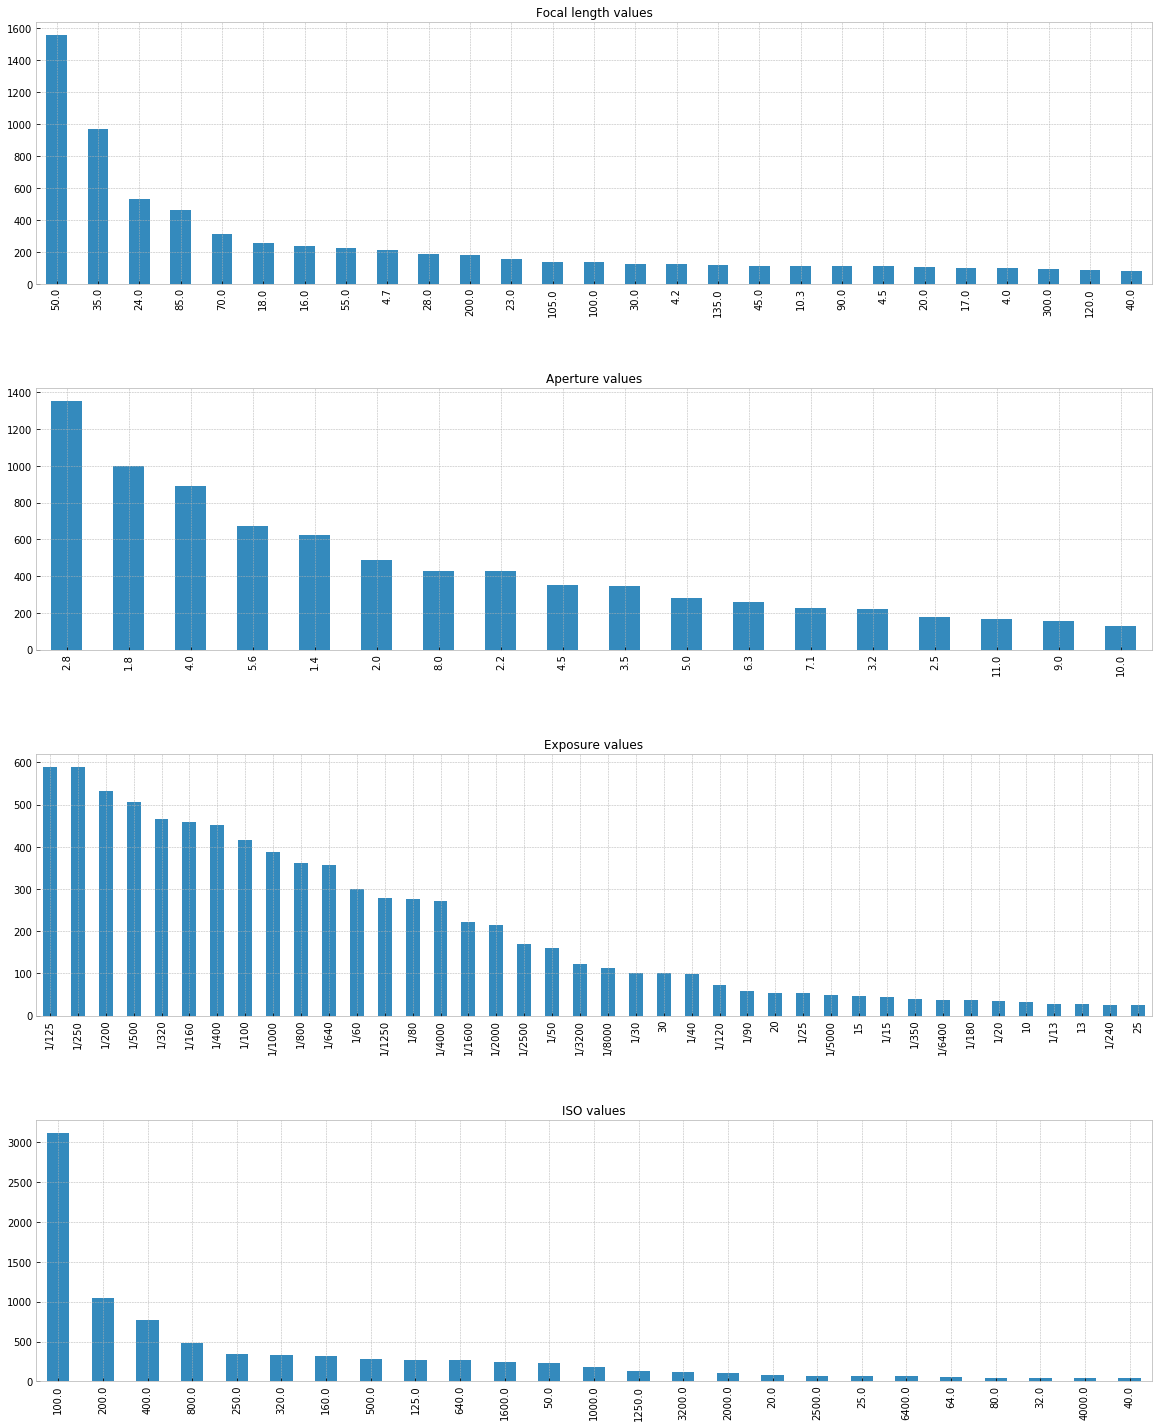

In [25]:
pu.exif_analysis(train_vertical,'dataset')

### Write dataset

In [25]:
train_full.to_csv('../../../dataset/full/train.csv')
valid_full.to_csv('../../../dataset/full/valid.csv')
test_full.to_csv('../../../dataset/full/test.csv')
test_nan_full.to_csv('../../../dataset/full/test_nan.csv')

In [26]:
train_horizontal.to_csv('../../../dataset/horizontal/train_horizontal.csv')
valid_horizontal.to_csv('../../../dataset/horizontal/valid_horizontal.csv')
test_horizontal.to_csv('../../../dataset/horizontal/test_horizontal.csv')
test_nan_horizontal.to_csv('../../../dataset/horizontal/test_nan_horizontal.csv')

In [27]:
train_vertical.to_csv('../../../dataset/vertical/train_vertical.csv')
valid_vertical.to_csv('../../../dataset/vertical/valid_vertical.csv')
test_vertical.to_csv('../../../dataset/vertical/test_vertical.csv')
test_nan_vertical.to_csv('../../../dataset/vertical/test_nan_vertical.csv')

### Misc section

In [ ]:
dataset['exif_iso'].loc[dataset['exif_exposure_time'] == '41 X 300 "']

In [52]:
photos['exif_camera_model']

0                   SLT-A77V
1            Canon EOS 1100D
2        Canon EOS REBEL T3i
3         Canon EOS REBEL T3
4                NIKON D3200
                ...         
24992                  FC220
24993            NIKON D7200
24996            Canon EOS R
24997    Canon EOS Rebel SL2
24998              ILCE-6000
Name: exif_camera_model, Length: 21203, dtype: object

In [10]:
u_cameras = photos['exif_camera_model'].unique()
cameras = photos['exif_camera_model'].to_string()
print("Unique cameras %d" % len(u_cameras))

Unique cameras 913


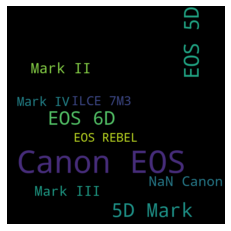

In [76]:
camera_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(cameras)
plt.axis("off")
plt.imshow(camera_cloud, interpolation='bilinear')

### Keywords

In [14]:
datasets['keywords'].columns

Index(['photo_id', 'keyword', 'ai_service_1_confidence',
       'ai_service_2_confidence', 'suggested_by_user'],
      dtype='object')

In [15]:
u_keywords = datasets['keywords']['keyword'].unique()
keywords = datasets['keywords']['keyword'].to_string()
print("Unique keywords %d" % len(u_keywords))

Unique keywords 27613


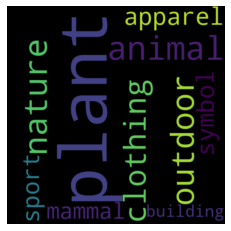

In [77]:
keyword_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(keywords)
plt.axis("off")
plt.imshow(keyword_cloud, interpolation='bilinear')

## Conversions

In [17]:
u_conversions_keys = datasets['conversions']['keyword'].unique()
print(len(u_conversions_keys))

223508


In [18]:
converstions_keys = datasets['conversions']['keyword'].to_string()
convertion_key_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(converstions_keys)


NameError: name 'plt' is not defined

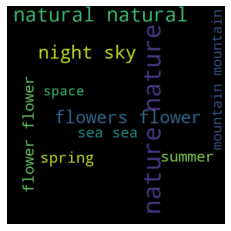

In [20]:
plt.axis("off")
plt.imshow(convertion_key_cloud, interpolation='bilinear')

## Collections

In [21]:
u_collections_titles = datasets['collections']['collection_title'].unique()
print(len(u_collections_titles))

178154


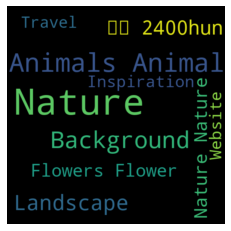

In [22]:
collections_titles = datasets['collections']['collection_title'].to_string()
collections_titles_cloud = WordCloud(width=580, height=580, margin=0, max_words=10, background_color = 'black').generate(collections_titles)
plt.axis("off")
plt.imshow(collections_titles_cloud, interpolation='bilinear')

In [ ]:
## Locate photos

In [ ]:
dataset['photo_id'].loc[dataset['exif_exposure_time'] == '915']

In [53]:
datasets['photos']['photo_image_url'].loc[datasets['photos']['photo_id'] == 'sEDzxW4NhL4']

18136    https://images.unsplash.com/photo-158601949619...
Name: photo_image_url, dtype: object

In [17]:
photos.loc[photos['photo_id'] == 'WSKaNV76wRs']

,photo_id,exif_camera_make,exif_camera_model,exif_iso,exif_focal_length,exif_aperture_value,exif_exposure_time,orientation
5557,WSKaNV76wRs,SONY,ILCE-7,100.0,60.0,100.0,1/125,1


In [12]:
datasets['photos'].loc[datasets['photos']['photo_id'] == '8ZgJyLGbC7Y']

NameError: name 'datasets' is not defined

In [28]:
datasets['conversions'].loc[datasets['conversions']['photo_id'] == '0b4sfNTqBLU']

,converted_at,conversion_type,keyword,photo_id,anonymous_user_id,conversion_country
8905,2020-02-29 18:49:47,download,marijuana,0b4sfNTqBLU,2689c4a3-6067-49f1-8bf7-09473c8bdb77,CA
59639,2020-03-03 19:07:10,download,cannabis,0b4sfNTqBLU,9cd972ff-edfa-42c3-9a9f-32f453b1639e,US
156240,2020-03-09 21:46:01,download,marijuana,0b4sfNTqBLU,1cdd8d2d-1473-4d8e-b3d1-ccd756f28ac0,US
174619,2020-03-16 15:06:48,download,marijuana and tinctures,0b4sfNTqBLU,fbd50bb1-3ccd-46d5-b82c-c8ec16e45ea8,US
187922,2020-03-12 20:19:13,download,cannabis,0b4sfNTqBLU,90b05b6a-193a-42de-b1d2-8fd63f04fd55,CA
...,...,...,...,...,...,...
3812100,2020-06-26 20:43:50.548,download,eating food,0b4sfNTqBLU,d9d4bf8b-a191-4173-9a7c-267652506775,ES
3826644,2020-06-11 19:39:05.418,download,cannabis,0b4sfNTqBLU,d1d4d773-1d04-4ea6-a769-3e3eeaba61d2,US
3835821,2020-06-28 05:41:50.859,download,eating,0b4sfNTqBLU,0bd3aea8-96c7-4f88-b425-01d6f11a399a,US
3969802,2020-06-19 00:57:03.419,download,weed,0b4sfNTqBLU,4fa35bf0-403e-435c-be55-2d6142786ae8,TW


In [29]:
datasets['keywords'].loc[datasets['keywords']['photo_id'] == '0b4sfNTqBLU']

,photo_id,keyword,ai_service_1_confidence,ai_service_2_confidence,suggested_by_user
2619868,0b4sfNTqBLU,closet,24.967670,NaN,f
2619869,0b4sfNTqBLU,fashion,23.274206,NaN,f
2619870,0b4sfNTqBLU,military,37.976463,NaN,f
2619871,0b4sfNTqBLU,accessory,92.576630,NaN,f
2619872,0b4sfNTqBLU,candy,24.741817,NaN,f
...,...,...,...,...,...
2620003,0b4sfNTqBLU,teeth,16.160416,NaN,f
2620004,0b4sfNTqBLU,burger,38.315941,NaN,f
2620005,0b4sfNTqBLU,confectionery,42.486397,NaN,f
2620006,0b4sfNTqBLU,neck,23.576967,NaN,f


In [30]:
datasets['collections'].loc[datasets['collections']['photo_id'] == '0b4sfNTqBLU']

,photo_id,collection_id,collection_title,photo_collected_at
41721,0b4sfNTqBLU,9314334,CALIPHORIA,2020-01-02 04:12:49
41722,0b4sfNTqBLU,3558778,Women,2018-11-22 09:09:46
41723,0b4sfNTqBLU,1367542,Pessoas,2017-11-08 09:36:27
41724,0b4sfNTqBLU,4488418,Cannabis + Lifestyle,2019-03-19 20:55:02
41725,0b4sfNTqBLU,8568557,Ver Smaerts,2019-09-04 17:46:16
...,...,...,...,...
41742,0b4sfNTqBLU,3659376,bud,2018-12-12 01:39:59
41743,0b4sfNTqBLU,6137119,feeding,2019-07-01 12:54:18
41744,0b4sfNTqBLU,3358754,People,2018-10-15 01:18:02
41745,0b4sfNTqBLU,9527448,BTS Stories,2020-02-11 15:37:32


In [4]:
datasets['photos']['photo_id'][21000]

'K03EeiFqtps'

## Save URLs

In [17]:
save_path = '/home/steve/Documents/Msc data science/Thesis/dataset/unsplash-dataset/'

In [31]:
url_list = datasets['photos']['photo_image_url'].values

In [32]:
url_list

array(['https://images.unsplash.com/40/KJyFV5SZSweiYGhMhrqC_MD4817.jpg',
       'https://images.unsplash.com/31/xDtuvK3GRJGUSUHgj0ew_IMG_3860.jpg',
       'https://images.unsplash.com/photo-1415353115981-9bb4c22bafed',
       ...,
       'https://images.unsplash.com/photo-1591568164230-62371697e356',
       'https://images.unsplash.com/photo-1591229677225-2e8fc742b80c',
       'https://images.unsplash.com/photo-1591391974719-b03b035e8e5b'],
      dtype=object)

In [34]:
np.savetxt(save_path+'urls.txt', url_list, fmt='%15s')

In [309]:
'''
There were two missing images
'''
ids =  datasets['photos'].loc[:,['photo_id']]
sids = ids[:15000].sort_values(by='photo_id')

path = '/media/steve/Data2/unsplash-dataset/images/'
files = glob.glob(path + "*.jpg")

mids = []
for f in files:
    mids.append(f.split('/')[6].split('.')[0])

mids.sort()

mids.append('2')

sids['mid'] = mids

comparison_column = np.where(sids["photo_id"] == sids["mid"], True, False)